In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.476995,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.556873,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.597177,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.617680,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3808,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3809,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3810,ZWILCH,0.000030,0.770176,1.843545,0.101584,1.843545
3811,ZWINT,0.001874,0.892371,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [38]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [39]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [40]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [41]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [42]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [43]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [44]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [45]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [46]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [47]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [48]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [49]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:BP'])

In [50]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [51]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [52]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [53]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [54]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
0,GO:BP,GO:0044281,small molecule metabolic process,4.682497e-04,True,"""The chemical reactions and pathways involving small molecules, any low molecular weight, monomeric, non-encoded molecule."" [GOC:curators, GOC:pde, GOC:vw]",1398,1349,202,13575,0.149741,0.144492,query_1,[GO:0008152],"[RPIA, ASAH1, LONP2, DCTPP1, STOML2, PAICS, PTGES, AMACR, FLAD1, CA4, GPT2, USP7, STAT3, PSMD10, PRUNE1, AGK, IARS2, GALK2, CAV1, KDM3A, ENTPD5, UGDH, XDH, CD36, ADSL, PPAT, PGK1, TYMS, CTH, TK1, PARG, SMUG1, TARS2, FDFT1, PRPSAP2, PLOD2, UAP1, ECI1, GFPT1, PLAA, SEPSECS, PSPH, SELENOS, MTHFD2, PANK2, AASS, TALDO1, MARS2, PYCR1, SDR16C5, LDHA, ATP7A, NAMPT, NANP, MCAT, RPE, DUSP12, PARS2, ACP5, ACBD5, OXCT1, GCSH, GFPT2, SEC14L2, MTHFD1L, RRM2, GLUD1, NMNAT1, AHCY, GNPNAT1, CYP27A1, RDH10, PSAT1, AASDHPPT, PMM2, SHMT2, ALDH18A1, TKFC, PTGS2, ACSS1, GDA, MLYCD, CA12, CARS, CAD, GCLC, EPHA2, FADS2, LPIN1, SCD, AKR1B10, SLC16A1, PGM2L1, GLS, SLC25A12, CTPS1, SLC27A4, GMDS, PGAM1, DCAKD, ...]","[[IBA], [IDA, IMP], [IMP], [IDA, IMP, ISS, IBA], [IMP], [TAS], [IDA, IBA, TAS], [IDA, TAS], [IBA, TAS], [IBA], [IDA, TAS], [IDA], [IMP], [TAS], [IBA], [IBA], [IBA, TAS], [IBA], [ISS], [IDA], [ISS, IBA, TAS], [IDA, TAS], [IDA, IBA, TAS], [TAS], [IDA, IBA, TAS, IC], [IBA, TAS], [IMP, IBA, TAS], [IDA, IBA, TAS], [IDA, IBA, TAS], [IBA, TAS], [IBA], [TAS], [IBA, TAS], [IBA, TAS], [IBA], [IDA], [IBA, TAS], [ISS, IBA, TAS, NAS], [IBA, TAS], [ISS], [TAS], [IDA, IBA, TAS], [TAS], [IBA, TAS], [IMP, IBA, NAS], [IBA, TAS, NAS], [TAS], [IDA, IBA, TAS], [IDA, IBA, TAS], [IDA, IBA], [TAS, NAS], [ISS], [TAS], [IDA], [IDA, IBA, TAS], [IBA], [IBA], [IBA], [TAS], [TAS], [IMP, IBA, TAS], [IBA, TAS], [IBA, TAS], [NAS], [IDA, IBA, TAS], [ISS, IBA, TAS], [IDA, ISS, IBA, TAS], [IBA, IC], [TAS], [IBA, TAS], [IDA, IBA, TAS], [IDA], [IBA, TAS, NAS], [IBA, TAS], [IBA, TAS], [IDA, IGI, IBA, TAS], [IMP, TAS], [IBA, TAS], [IDA, IMP, ISS, TAS, NAS], [IDA, TAS], [IBA, TAS], [IDA, IMP, IBA, TAS], [IBA], [IDA, IBA, TAS], [IDA, ISS, IBA, TAS], [IDA], [IMP], [TAS], [ISS, IBA], [IDA, IBA, TAS], [IDA, IMP], [TAS], [TAS], [IDA, IBA, TAS, NAS], [TAS], [IDA, IMP, IBA, TAS], [IDA, IBA], [IDA, IGI, IBA], [IDA, TAS], [IBA], ...]",regression_unranked
1,GO:BP,GO:0044282,small molecule catabolic process,2.414890e-03,True,"""The chemical reactions and pathways resulting in the breakdown of small molecules, any low molecular weight, monomeric, non-encoded molecule."" [GOC:curators, GOC:vw]",337,1349,66,13575,0.048925,0.195846,query_1,"[GO:0009056, GO:0044281]","[LONP2, AMACR, ENTPD5, PGK1, CTH, ECI1, AASS, MCAT, RPE, ACBD5, OXCT1, GCSH, GLUD1, CYP27A1, SHMT2, TKFC, LPIN1, AKR1B10, PGM2L1, GLS, SLC27A4, PGAM1, UPP1, HMGCL, PFKP, HGD, ECI2, PFKL, MT3, PKM, GSK3A, GOT1, IL4I1, SORD, PTEN, AKT2, AKT1, TST, GALE, ACADVL, SDS, PNP, MPST, GOT2, SYNJ2, SLC27A2, ALDOA, APOE, HK3, NPL, INPP5K, ADAL, CYP4F11, MECR, BCAT1, DLD, HIBADH, APOBEC3G, KYNU, ALDH1L1, RENBP, CRYM, ASRGL1, LDHD, IDO1, PGM1]","[[IMP], [TAS], [TAS], [TAS], [TAS], [ISS, IBA, TAS, NAS], [TAS, NAS], [TAS], [IBA], [TAS], [TAS], [IBA, TAS], [IDA, IBA], [IDA], [IBA], [IBA, TAS], [ISS, IBA], [IDA], [TAS], [IDA, IBA, NAS], [IBA], [TAS], [IDA, TAS], [IBA, TAS, NAS], [IBA, TAS], [IBA, TAS], [ISS, TAS], [IBA, TAS], [ISS], [TAS], [IC], [IDA], [IBA, TAS], [IDA, IMP, IBA, TAS], [IDA], [IMP], [IMP], [TAS], [IDA, IBA, TAS], [IDA, IMP, ISS, TAS], [IDA, IBA, TAS], [IDA], [TAS], [IDA, IBA, TAS], [IBA], [IDA, IBA, TAS], [TAS], [IBA], [TAS], [TAS], [IDA, IBA], [IBA], [IDA, IBA], [TAS], [TAS], [TAS], [IDA, IBA, TAS], [IDA], [IMP, IBA, TAS], [TAS], [TAS], [TAS], [IDA, ISS, IBA, TAS], [IMP, IBA], [IBA, TAS], [TAS]]",regression_unranked
2,GO:BP,GO:0006950,response to stress,2.948620e-03,True,"""Any process that results in a change in state or activity of a cell or an organism (in terms of moveme

In [55]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

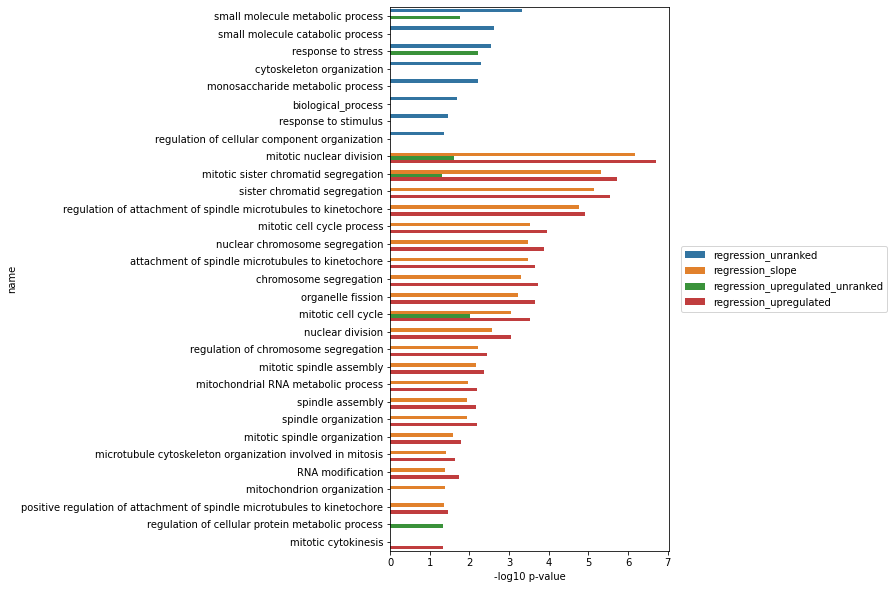

In [56]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [57]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [58]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-58-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [59]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
2,"{regression_upregulated_unranked, regression_slope, regression_upregulated}","{mitotic cell cycle, mitotic nuclear division, mitotic sister chromatid segregation}",0.75
0,"{regression_upregulated_unranked, regression_unranked}","{response to stress, small molecule metabolic process}",0.50
3,"{regression_slope, regression_upregulated}","{mitotic cell cycle process, nuclear chromosome segregation, spindle organization, mitotic spindle assembly, RNA modification, positive regulation of attachment of spindle microtubules to kinetochore, spindle assembly, regulation of attachment of spindle microtubules to kinetochore, regulation of chromosome segregation, organelle fission, attachment of spindle microtubules to kinetochore, nuclear division, mitotic spindle organization, mitochondrial RNA metabolic process, microtubule cytoskeleton organization involved in mitosis, chromosome segregation, sister chromatid segregation}",0.50
1,{regression_unranked},"{cytoskeleton organization, regulation of cellular component organization, monosaccharide metabolic process, biological_process, response to stimulus, small molecule catabolic process}",0.25
4,{regression_slope},{mitochondrion organization},0.25
5,{regression_upregulated_unranked},{regulation of cellular protein metabolic process},0.25
6,{regression_upregulated},{mitotic cytokinesis},0.25


In [60]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,mitotic cell cycle,0.75
1,mitotic nuclear division,0.75
2,mitotic sister chromatid segregation,0.75
3,response to stress,0.50
4,small molecule metabolic process,0.50
5,mitotic cell cycle process,0.50
6,nuclear chromosome segregation,0.50
7,spindle organization,0.50
8,mitotic spindle assembly,0.50
9,RNA modification,0.50


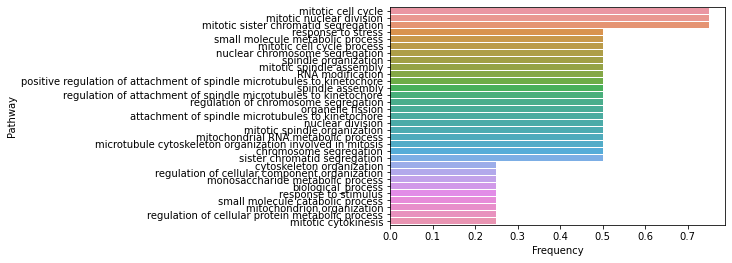

In [64]:
axes = sns.barplot(data = upregulated_pathways_df, y = 'Pathway', x = 'Frequency')


In [62]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [63]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
0,{regression_unranked},"{cytoskeleton organization, small molecule metabolic process, regulation of cellular component organization, monosaccharide metabolic process, biological_process, response to stimulus, response to stress, small molecule catabolic process}",0.25
1,{regression_slope},"{mitotic sister chromatid segregation, mitotic nuclear division, mitotic cell cycle, organelle fission, attachment of spindle microtubules to kinetochore, microtubule cytoskeleton organization involved in mitosis, nuclear chromosome segregation, spindle organization, RNA modification, regulation of attachment of spindle microtubules to kinetochore, mitochondrion organization, nuclear division, mitotic spindle organization, sister chromatid segregation, positive regulation of attachment of spindle microtubules to kinetochore, regulation of chromosome segregation, mitochondrial RNA metabolic process, chromosome segregation, mitotic cell cycle process, mitotic spindle assembly, spindle assembly}",0.25
2,{regression_downregulated_unranked},{actin filament-based process},0.25
3,{regression_downregulated},"{Malaria, Amino sugar and nucleotide sugar metabolism, Glycolysis / Gluconeogenesis, Arrhythmogenic right ventricular cardiomyopathy, Cholesterol metabolism, Viral myocarditis, Phagosome}",0.25
